# <center> DATA SCIENCE WITH SOCIAL SCIENCE DATA: <br/> BUILDING PREDICTIVE MODELS USING PYTHON'S SCIKIT-LEARN <br/><br/> CSCAR WORKSHOP <br/><br/> 27/10/2017
## <center> Marcio Mourao and Jeff Lockhart

# <center> Setup for Anaconda / Jupyter Notebook

<ul>
    <li>Go to the page https://marcio-mourao.github.io/</li>
    <li>Download the materials (first two docs) under "Social Data Science" to your "username/Documents"</li><br/>
    
    <li>Click the Windows button (Bottom Left Corner)</li>
    <li>Click "All apps"</li>
    <li>Click "Anaconda3"</li>
    <li>Click "Anaconda Prompt" </li>
    <ul>
        <li>Enter "conda update scikit-learn"</li>
    </ul><br/>
    
    <li>Click the Windows button (Bottom Left Corner)</li>
    <li>Click "All apps"</li>
    <li>Click "Anaconda3"</li>
    <li>Click "Jupyter Notebook" </li><br/>
    <li>Upload 'adult.csv' (may not be necessary)</li>
    <li>Click "Workshop6.ipynb" (this should open a new tab in the browser)</li>
</ul>

# <center> Introduction

<ul>
  <li>Please, sign up the sheet! </li>
  <li>Don't forget to go to: http://cscar.research.umich.edu/ to know what we're offering!</li>
  <li>Any questions/feedback, you can send an email to <a href="mailto:mdam@umich.edu" target="_top">Marcio.</a>
</ul>

# <center> Summary of this workshop

<ul>
  <li>Summary of Python Data Types</li>
  <li>Using Pandas Dataframes to load and describe the data </li>
  <li>Using Scikit-learn to analyze data</li>
</ul>



# <center> References

<ul>
  <li>https://www.continuum.io/anaconda-overview</li>
  <li>http://www.numpy.org/</li>
  <li>http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html</li>
  <li>http://matplotlib.org/</li>
  <li>http://pandas.pydata.org/pandas-docs/stable/10min.html</li>
</ul>

## Import relevant general modules

In [296]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [297]:
import sys
print(sys.version)

print(np.__version__)
print(pd.__version__)

3.5.3 |Anaconda custom (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
1.13.3
0.20.3


## Summary of Python Data Types

### Python Simple Data Types
##### Integers
##### Floats
##### Strings
##### Booleans

### Python Data Structures

### Lists

In [200]:
example_list = [2,4,'fg',8,[3,4]]
print(example_list)
print(example_list[0])
print(example_list[2:4])
print(example_list[-2])

[2, 4, 'fg', 8, [3, 4]]
2
['fg', 8]
8


In [201]:
example_list[2]=20
print(example_list)
print(example_list[4][0])

[2, 4, 20, 8, [3, 4]]
3


### Tuples

In [202]:
example_tuple = (2,4,6,8,10)
print(example_tuple)
print(example_tuple[1])
#example_tuple[2]=20 # this should produce an error

(2, 4, 6, 8, 10)
4


### Dictionary

In [203]:
example_dictionary = {'A':20,'B':40,'C':60}
print(example_dictionary)
print(example_dictionary['B'])
example_dictionary['C']=100
print(example_dictionary)
print(example_dictionary.keys())
print(example_dictionary.values())
aux=example_dictionary.values()
#example_dictionary[0] # this should produce an error as order does not matter in a Python dictionary

{'B': 40, 'C': 60, 'A': 20}
40
{'B': 40, 'C': 100, 'A': 20}
dict_keys(['B', 'C', 'A'])
dict_values([40, 100, 20])


### Numpy arrays

In [204]:
example_array = np.array([2,4,'4',8,10])
print(example_array)
print(example_array[0])
print(example_array[2:4])
print(example_array[-2])
example_array[2]='20'
print(example_array)

['2' '4' '4' '8' '10']
2
['4' '8']
8
['2' '4' '20' '8' '10']


### Pandas Series
#### A one dimensional labeled array

In [205]:
example_dictionary = {'A':20,'B':40,'C':60,'D':55}
example_series = pd.Series(example_dictionary)
print(example_series)
print(example_series[0])
print(example_series['B':])

A    20
B    40
C    60
D    55
dtype: int64
20
B    40
C    60
D    55
dtype: int64


### Pandas Dataframes
#### A two-dimensional labeled data structure with columns of potentially different types

In [206]:
#Creation with a list
aux=[['ds',1.0],
     ['as',3],
     ['bq',5]]

example_DF = pd.DataFrame(aux,index=['Row1','Row2','Row3'],columns=['Col1','Col2'])
example_DF

,Col1,Col2
Row1,ds,1.0
Row2,as,3.0
Row3,bq,5.0


In [207]:
#Creation with a numpy array
example_DF=pd.DataFrame(np.random.randint(0,10,(3,2)),index=['Row1','Row2','Row3'],columns=['Col1','Col2'])
example_DF

,Col1,Col2
Row1,3,8
Row2,1,3
Row3,5,4


In [208]:
#Creation with a dictionary
example_DF=pd.DataFrame({'Col1':range(3),'Col2':pd.Series([4,5,6],index=[1,2,3])})
example_DF

,Col1,Col2
1,0,4
2,1,5
3,2,6


## Some info about the dataset

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

<b>The prediction task is to determine whether a person makes over $50K a year!</b>

<b>Attributes:</b>

income: >50K, <=50K

age: continuous

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked

fnlwgt: continuous

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool

education-num: continuous

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black

sex: Female, Male

capital-gain: continuous

capital-loss: continuous

hours-per-week: continuous

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands

## Load and describe the data

In [209]:
#Displays signature of the function
?pd.read_csv

In [210]:
#Creates a dataframe named "adults" from reading the file "adult.csv"
adults = pd.read_csv('adult.csv',na_values=['?'])
adults.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [211]:
#Obtains the number of lines and columns of the dataframe
adults.shape

(32561, 15)

In [212]:
#Obtains the dataframe main types
adults.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [213]:
#Displays first lines of the dataframe
adults.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [214]:
#Displays last lines of the dataframe
adults.tail(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [215]:
#Returns a numpy array with the index values
adults.index.values

array([    0,     1,     2, ..., 32558, 32559, 32560])

In [216]:
#Returns a numpy array with the column values
adults.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'], dtype=object)

In [217]:
#Returns all the values on the dataframe on a bidimensional numpy array
adults.values[0:5,]

array([[90, nan, 77053, 'HS-grad', 9, 'Widowed', nan, 'Not-in-family',
        'White', 'Female', 0, 4356, 40, 'United-States', '<=50K'],
       [82, 'Private', 132870, 'HS-grad', 9, 'Widowed', 'Exec-managerial',
        'Not-in-family', 'White', 'Female', 0, 4356, 18, 'United-States',
        '<=50K'],
       [66, nan, 186061, 'Some-college', 10, 'Widowed', nan, 'Unmarried',
        'Black', 'Female', 0, 4356, 40, 'United-States', '<=50K'],
       [54, 'Private', 140359, '7th-8th', 4, 'Divorced',
        'Machine-op-inspct', 'Unmarried', 'White', 'Female', 0, 3900, 40,
        'United-States', '<=50K'],
       [41, 'Private', 264663, 'Some-college', 10, 'Separated',
        'Prof-specialty', 'Own-child', 'White', 'Female', 0, 3900, 40,
        'United-States', '<=50K']], dtype=object)

In [218]:
#Provides a statistical summary of the adults data
adults.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [219]:
#Provides a statistical summary of the adults data
adults.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [220]:
#Summarizes just the column 'age
adults['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [221]:
#Create a numpy array with object features
objFeatures = adults.select_dtypes(include=['object']).columns.values
print(objFeatures)

#Convert objects to categoricals
for col in objFeatures:
    adults[col] = adults[col].astype('category')

['workclass' 'education' 'marital.status' 'occupation' 'relationship'
 'race' 'sex' 'native.country' 'income']


In [222]:
#Displays the data types associated with each dataframe column
adults.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education.num        int64
marital.status    category
occupation        category
relationship      category
race              category
sex               category
capital.gain         int64
capital.loss         int64
hours.per.week       int64
native.country    category
income            category
dtype: object

In [223]:
#Displays whether columns contain any null values
adults.isnull().any(axis=0)

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

In [224]:
#Count the number of missing values in each column of the dataframe
adults.apply(lambda x: sum(x.isnull()),axis=0)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [225]:
#Count the number of missing values in each column of the dataframe and sums them up
adults.apply(lambda x: sum(x.isnull()),axis=0).sum()

4262

In [226]:
#Count number of lines with NaNs
adults.apply(lambda x: x.isnull().any(),axis=1).sum()

2399

In [227]:
#Fraction of observations with NaNs (potentially for removal)
2399/adults.shape[0]

0.07367709836921471

In [228]:
#Removes any lines from the dataframe that contains NaNs 
#(be careful about what you decide to do with missing values)
adults=adults.dropna(axis=0,how='any')
adults.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [229]:
#Displays number of lines and number of columns of the dataframe
adults.shape

(30162, 15)

## Machine Learning

In [294]:
#Just checking the version
import sklearn
print(sklearn.__version__)

0.19.1


In [295]:
#Import modules
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics

In [275]:
#A reminder of the variables we have
adults.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [276]:
#Before moving forward, lets drop potentially irrelevant features of the data
#Feel free to go back here, drop or add features
adults2=adults.drop(['workclass','fnlwgt','education','capital.gain','capital.loss','native.country'], axis=1)

In [277]:
#Check types
adults2.dtypes

age                  int64
education.num        int64
marital.status    category
occupation        category
relationship      category
race              category
sex               category
hours.per.week       int64
income            category
dtype: object

In [278]:
#Create a numpy array with object features
catFeatures = adults2.select_dtypes(include=['category']).columns.values

#Factorize category features
for col in catFeatures:
    adults2[col + '_enc']=pd.factorize(adults2[col].values)[0]

#Remove initial object columns
adults2 = adults2.drop(catFeatures,axis=1)

In [279]:
#Check new data types
adults2.dtypes

age                   int64
education.num         int64
hours.per.week        int64
marital.status_enc    int64
occupation_enc        int64
relationship_enc      int64
race_enc              int64
sex_enc               int64
income_enc            int64
dtype: object

In [280]:
#Describe the data
adults2.describe(include='all')

,age,education.num,hours.per.week,marital.status_enc,occupation_enc,relationship_enc,race_enc,sex_enc,income_enc
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,40.931238,3.100126,4.360221,2.376931,0.213646,0.675685,0.248922
std,13.134665,2.549995,11.979984,1.161214,3.097132,1.758105,0.622172,0.468126,0.432396
min,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,10.000000,40.000000,3.000000,4.000000,2.000000,0.000000,1.000000,0.000000
75%,47.000000,13.000000,45.000000,4.000000,7.000000,4.000000,0.000000,1.000000,0.000000
max,90.000000,16.000000,99.000000,6.000000,13.000000,5.000000,4.000000,1.000000,1.000000


In [281]:
##### PRIMARY APPROACH #####

#Apply OneHot encoding to the categorical features
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categorical_features=np.arange(3,8), sparse=False)
adults3 = enc.fit_transform(adults2.values)
print(enc.n_values_)
print(enc.feature_indices_)
print(enc.active_features_)
print(adults3.shape)

[ 7 14  6  5  2]
[ 0  7 21 27 32 34]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33]
(30162, 38)


In [282]:
##### PRIMARY APPROACH #####

#Define covariates in X and dependent variable in y
X = adults3[:,np.arange(0,adults3.shape[1]-1)]
y = adults3[:,adults3.shape[1]-1]

print(X.shape)
print(y.shape)

(30162, 37)
(30162,)


In [259]:
##### ALTERNATIVE APPROACH #####

#Define covariates in X and dependent variable in y
X = adults2[['age','education.num','hours.per.week','marital.status_enc','occupation_enc',
            'relationship_enc','race_enc','sex_enc']]
y = adults2.income_enc

In [283]:
#Obtain the data for the fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)

print('Total number of records: ', adults2.shape[0])
print('Type of X_train: ', type(X_train))
print('Number of records in X_train: ', len(X_train))
print('Fraction on X_train: ', len(X_train)/adults2.shape[0])
print('Number of records in y_train: ', len(y_train))
print('Type of y_train: \n\n', type(y_train))

print('Type of X_test: ', type(X_test))
print('Number of records in X_test: ', len(X_test))
print('Fraction on X_test: ', len(X_test)/adults2.shape[0])
print('Number of records in y_test: ', len(y_test))
print('Type of y_test: ', type(y_test))

Total number of records:  30162
Type of X_train:  <class 'numpy.ndarray'>
Number of records in X_train:  22621
Fraction on X_train:  0.7499834228499437
Number of records in y_train:  22621
Type of y_train: 

 <class 'numpy.ndarray'>
Type of X_test:  <class 'numpy.ndarray'>
Number of records in X_test:  7541
Fraction on X_test:  0.2500165771500564
Number of records in y_test:  7541
Type of y_test:  <class 'numpy.ndarray'>


### Logistic Regression

In [289]:
#Creates a Logistic Regression classification model
LR_model = LogisticRegression()

#Fit to the data
LR_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [290]:
#Obtain class predictions
y_pred_LR_prob = LR_model.predict_proba(X_test)
print('Predicted probabilities: \n', y_pred_LR_prob)

#Obtain probability predictions
y_pred_LR_class = LR_model.predict(X_test)
print('Predicted classes: \n', y_pred_LR_class)

Predicted probabilities: 
 [[ 0.18963377  0.81036623]
 [ 0.2661125   0.7338875 ]
 [ 0.40681459  0.59318541]
 ..., 
 [ 0.57893219  0.42106781]
 [ 0.99191059  0.00808941]
 [ 0.38431884  0.61568116]]
Predicted classes: 
 [ 1.  1.  1. ...,  0.  0.  1.]


In [291]:
#Obtains accuracy score
print('LR Score: ', metrics.accuracy_score(y_test, y_pred_LR_class))

LR Score:  0.829730804933


In [292]:
#Obtains confusion matrix
LR_cm=metrics.confusion_matrix(y_test,y_pred_LR_class)
LR_cm

array([[5268,  462],
       [ 822,  989]])

In [293]:
#KFolds and Cross_val_scores
kf = KFold(n_splits=10, shuffle=True)
print('Cross validation score: ', cross_val_score(LR_model, X, y, cv=kf).mean())

Cross validation score:  0.828526150224


### Random Forests

In [62]:
#Creates a RF classification model
RF_model = RandomForestClassifier(n_estimators=10, criterion='gini')

#Fit to the data
RF_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
#Obtain class predictions
y_pred_RF_prob = RF_model.predict_proba(X_test)
print('Predicted probabilities: \n', y_pred_RF_prob)

#Obtain probability predictions
y_pred_RF_class = RF_model.predict(X_test)
print('Predicted classes: \n', y_pred_RF_class)

Predicted probabilities: 
 [[ 0.585       0.415     ]
 [ 0.61916667  0.38083333]
 [ 0.6         0.4       ]
 ..., 
 [ 0.59619048  0.40380952]
 [ 1.          0.        ]
 [ 0.5         0.5       ]]
Predicted classes: 
 [ 0.  0.  0. ...,  0.  0.  0.]


In [64]:
#Obtains accuracy score
print('RF Score: ', metrics.accuracy_score(y_test, y_pred_RF_class))

RF Score:  0.801883039385


In [65]:
#Obtains confusion matrix
RF_cm=metrics.confusion_matrix(y_test,y_pred_RF_class)
RF_cm

array([[5121,  609],
       [ 885,  926]])

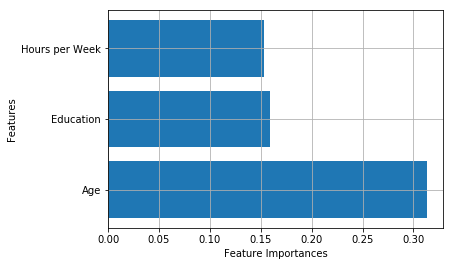

In [66]:
##### PRIMARY APPROACH #####

#Capture feature importance only for the continuous values of the data
feature_imp=RF_model.feature_importances_[34:37]

#Create plot of feature importance
positions = np.arange(len(feature_imp))
plt.barh(positions, feature_imp, align='center')
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.yticks(positions, ('Age','Education','Hours per Week'))
plt.grid(True)

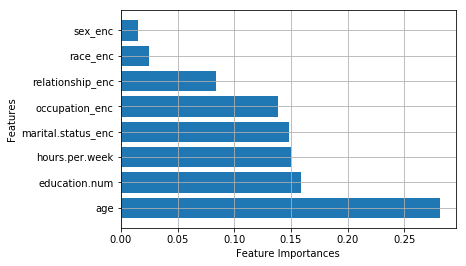

In [55]:
##### ALTERNATIVE APPROACH #####

#Capture feature importance from the RF model
feature_imp=RF_model.feature_importances_

#Create plot of feature importance
positions = np.arange(len(feature_imp))
plt.barh(positions, feature_imp, align='center')
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.yticks(positions, ('age','education.num','hours.per.week','marital.status_enc','occupation_enc',
            'relationship_enc','race_enc','sex_enc'))
plt.grid(True)

In [67]:
#KFolds and Cross_val_scores
kf = KFold(n_splits=10, shuffle=True)
print('Cross validation score: ', cross_val_score(RF_model, X, y, cv=kf).mean())

Cross validation score:  0.804720542479
